# Lab Activity Week 6

**Homework** Anything you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Step 1 - Review: Comparing Indoor vs Outdoor data
- Cut out any data that was part of your outdoor data set that was not taken outdoors or take a new outdoor data set that runs for an extra 30s to give you time to get outside and then cut out that 30s interval
  - Recall we learned methods for slicing dataframes in week 2
- Now produce histogram plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

### Step 2: Comparing sensors
- Get inside/outside data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 1. - Do the same statistical comparison of your outside data with the outside data from the other group.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

In [2]:
inside = pd.read_csv('weather_data_inside.csv')[1::]
inside2 = pd.read_csv('insideslice.csv')[3::]
outside = pd.read_csv('weather_quality_outside.csv')[120:361]
outside2 = pd.read_csv('outsideslice.csv')[63:300]
display(inside)
display(inside2)

display(outside)

,Time,PM1.0,PM2.5,PM10,Temperature,Gas,Relative Humidity,Pressure,Altitude
1,1.708125e+09,1,2,3,22.952070,43697,47.083663,1007.576081,47.346716
2,1.708125e+09,2,3,4,22.985664,39576,47.028632,1007.578716,47.324677
3,1.708125e+09,2,3,4,23.022773,38463,46.932709,1007.570375,47.394437
4,1.708125e+09,2,3,4,23.055977,38186,46.830461,1007.568958,47.406289
5,1.708125e+09,1,2,3,23.085859,38498,46.721972,1007.573766,47.366076
...,...,...,...,...,...,...,...,...,...
292,1.708125e+09,0,1,2,23.208516,272429,45.122235,1007.566103,47.430161
293,1.708125e+09,0,1,2,23.207539,272652,45.122121,1007.564455,47.443952
294,1.708125e+09,0,1,2,23.207539,274450,45.122121,1007.566146,47.429806
295,1.708125e+09,0,2,2,23.206953,273773,45.133739,1007.571922,47.381497


,Time,Temperature (C),Gas (ohm),Humidity (%),Pressure (hPa),Altitude (m),Time.1,PM1 (std),PM2.5 (std),PM10 (std)
3,1.708130e+09,23.101680,212810,41.739108,1008.136725,42.658755,2,2,3,NaN
4,1.708130e+09,23.110273,215033,41.704613,1008.135691,42.667394,2,2,3,NaN
5,1.708130e+09,23.119648,217017,41.676114,1008.139390,42.636475,2,2,3,NaN
6,1.708130e+09,23.128438,218167,41.665267,1008.136970,42.656703,2,2,3,NaN
7,1.708130e+09,23.136445,219329,41.648432,1008.138380,42.644913,2,2,3,NaN
...,...,...,...,...,...,...,...,...,...,...
294,1.708130e+09,23.896211,265045,39.587772,1008.369028,40.716912,1,2,2,NaN
295,1.708130e+09,23.897578,264832,39.599587,1008.361027,40.783789,1,2,2,NaN
296,1.708130e+09,23.897578,265045,39.582081,1008.366170,40.740797,1,2,2,NaN
297,1.708130e+09,23.898750,264832,39.582205,1008.373273,40.681427,1,2,2,NaN


,Time,PM1.0,PM2.5,PM10,Temperature,Gas,Relative Humidity,Pressure,Altitude
120,1.708126e+09,1,2,2,21.597969,310244,45.694844,1006.663076,54.985548
121,1.708126e+09,1,2,2,21.494648,311404,45.782312,1006.660524,55.006909
122,1.708126e+09,1,3,3,21.386055,312280,45.857488,1006.647324,55.117386
123,1.708126e+09,1,3,3,21.283711,309667,45.945126,1006.641270,55.168057
124,1.708126e+09,1,3,3,21.185859,312867,45.998168,1006.622535,55.324875
...,...,...,...,...,...,...,...,...,...
351,1.708127e+09,4,6,6,18.150703,400962,56.080669,1006.503888,56.318000
352,1.708127e+09,4,6,6,18.143867,401199,56.135327,1006.509075,56.274576
353,1.708127e+09,4,7,8,18.138789,403111,56.239643,1006.530669,56.093822
354,1.708127e+09,4,7,8,18.137227,400724,56.239437,1006.549835,55.933394


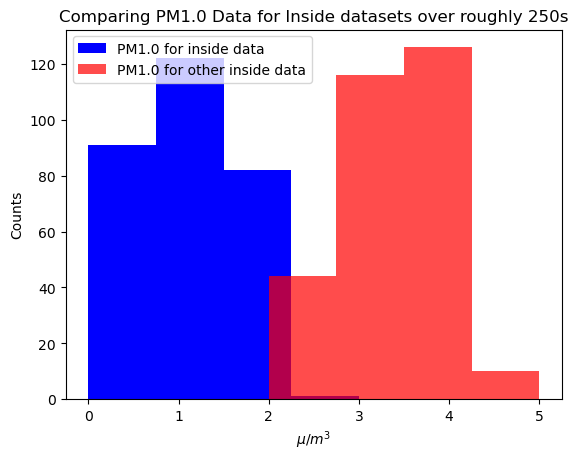

In [3]:
fig = plt.figure()
ax1 = plt.axes()

ax1.hist(inside['PM1.0'], label = 'PM1.0 for inside data', bins = 4, color = 'b')
ax1.hist(inside2['PM1 (std)'], label = 'PM1.0 for other inside data', bins = 4, color = 'r', alpha = 0.7)
ax1.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM1.0 Data for Inside datasets over roughly 250s')

plt.legend()
plt.show(ax1)

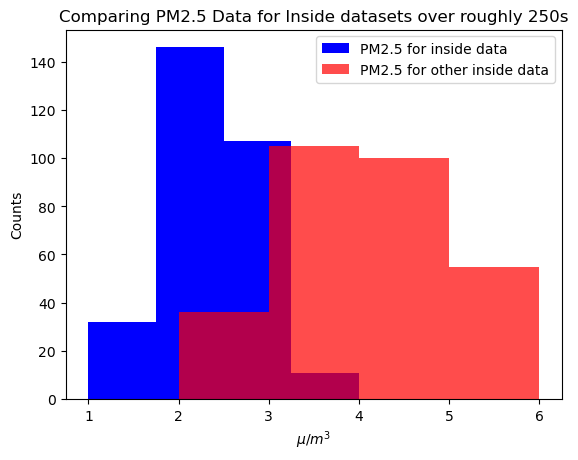

In [4]:
fig = plt.figure()
ax2 = plt.axes()

ax2.hist(inside['PM2.5'], label = 'PM2.5 for inside data', bins = 4, color = 'b')
ax2.hist(inside2['PM2.5 (std)'], label = 'PM2.5 for other inside data', bins = 4, color = 'r', alpha = 0.7)
ax2.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM2.5 Data for Inside datasets over roughly 250s')

plt.legend()
plt.show(ax2)

In [5]:
#fig = plt.figure()
#ax3 = plt.axes()
#
#ax3.hist(inside['PM10'], label = 'PM10 for inside data', bins = 4, color = 'b')
#ax3.hist(inside2['PM10 (std)'], label = 'PM10 for other inside data', bins = 4, color = 'r', alpha = 0.7)
#ax3.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM10 Data for Inside datasets over roughly 250s')

#plt.legend()
#plt.show(ax3)

Their PM10 data was all registered as NaN, so we can't compare.

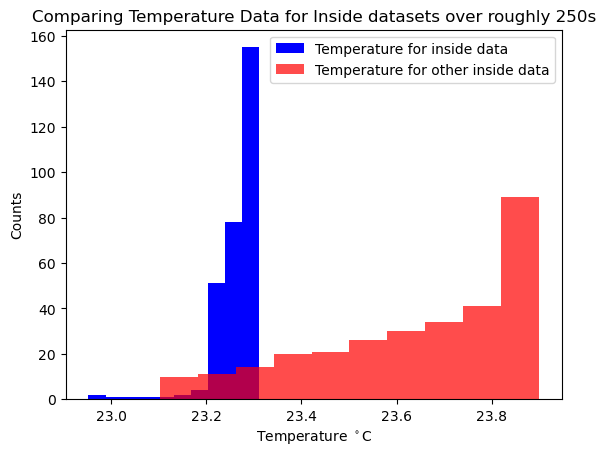

In [6]:
fig = plt.figure()
ax4 = plt.axes()

ax4.hist(inside['Temperature'], label = 'Temperature for inside data', bins = 10, color = 'b')
ax4.hist(inside2['Temperature (C)'], label = 'Temperature for other inside data', bins = 10, color = 'r', alpha = 0.7)
ax4.set(xlabel = r'Temperature $^\circ$C', ylabel = 'Counts', title = 'Comparing Temperature Data for Inside datasets over roughly 250s')

plt.legend()
plt.show(ax4)

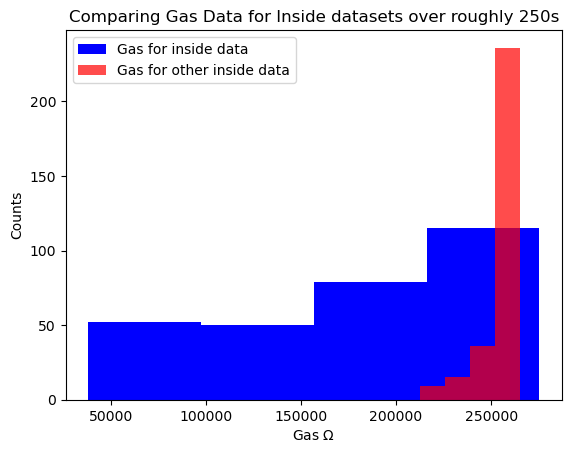

In [7]:
fig = plt.figure()
ax5 = plt.axes()

ax5.hist(inside['Gas'], label = 'Gas for inside data', bins = 4, color = 'b')
ax5.hist(inside2['Gas (ohm)'], label = 'Gas for other inside data', bins = 4, color = 'r', alpha = 0.7)
ax5.set(xlabel = r'Gas $\Omega$', ylabel = 'Counts', title = 'Comparing Gas Data for Inside datasets over roughly 250s')

plt.legend()
plt.show(ax5)

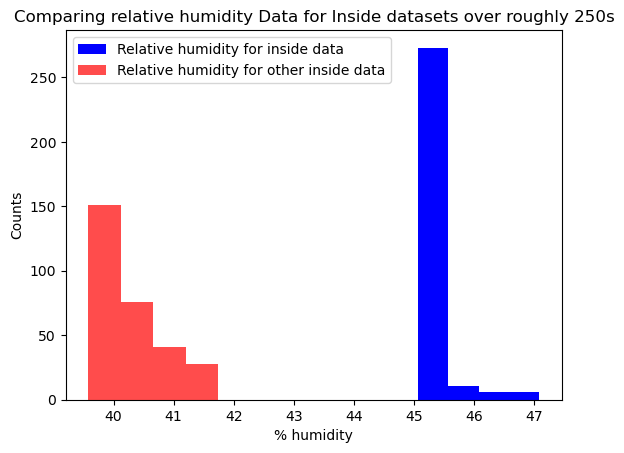

In [8]:
fig = plt.figure()
ax6 = plt.axes()

ax6.hist(inside['Relative Humidity'], label = 'Relative humidity for inside data', bins = 4, color = 'b')
ax6.hist(inside2['Humidity (%)'], label = 'Relative humidity for other inside data', bins = 4, color = 'r', alpha = 0.7)
ax6.set(xlabel = '% humidity', ylabel = 'Counts', title = 'Comparing relative humidity Data for Inside datasets over roughly 250s')

plt.legend()
plt.show(ax6)

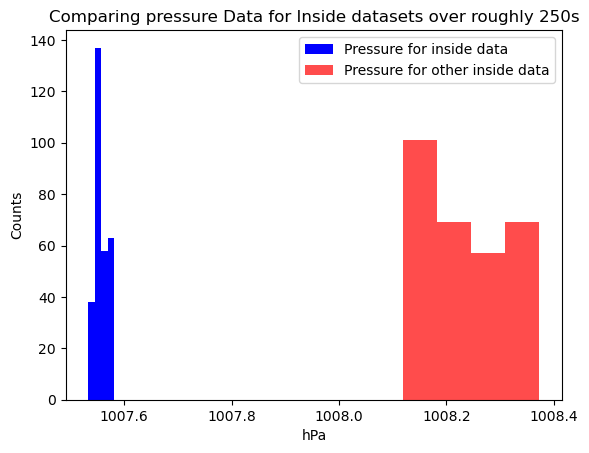

In [9]:
fig = plt.figure()
ax7 = plt.axes()

ax7.hist(inside['Pressure'], label = 'Pressure for inside data', bins = 4, color = 'b')
ax7.hist(inside2['Pressure (hPa)'], label = 'Pressure for other inside data', bins = 4, color = 'r', alpha = 0.7)
ax7.set(xlabel = 'hPa', ylabel = 'Counts', title = 'Comparing pressure Data for Inside datasets over roughly 250s')

plt.legend()
plt.show(ax7)

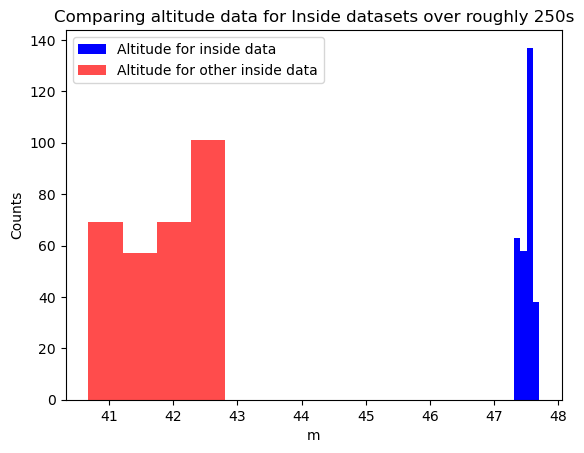

In [10]:
fig = plt.figure()
ax8 = plt.axes()

ax8.hist(inside['Altitude'], label = 'Altitude for inside data', bins = 4, color = 'b')
ax8.hist(inside2['Altitude (m)'], label = 'Altitude for other inside data', bins = 4, color = 'r', alpha = 0.7)
ax8.set(xlabel = 'm', ylabel = 'Counts', title = 'Comparing altitude data for Inside datasets over roughly 250s')

plt.legend()
plt.show(ax8)

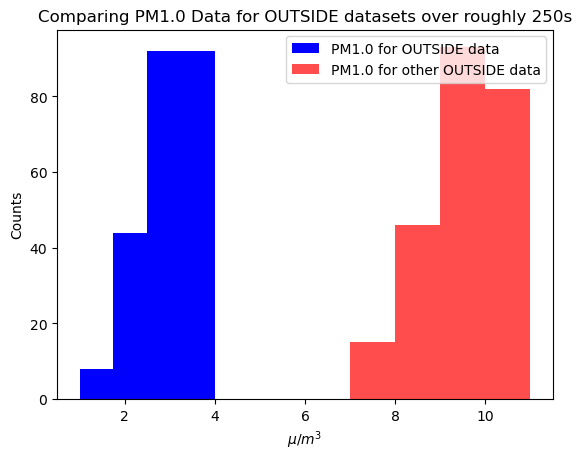

In [11]:
# outside
fig = plt.figure()
ax9 = plt.axes()

ax9.hist(outside['PM1.0'], label = 'PM1.0 for OUTSIDE data', bins = 4, color = 'b')
ax9.hist(outside2['PM1 (std)'], label = 'PM1.0 for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax9.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM1.0 Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax9)

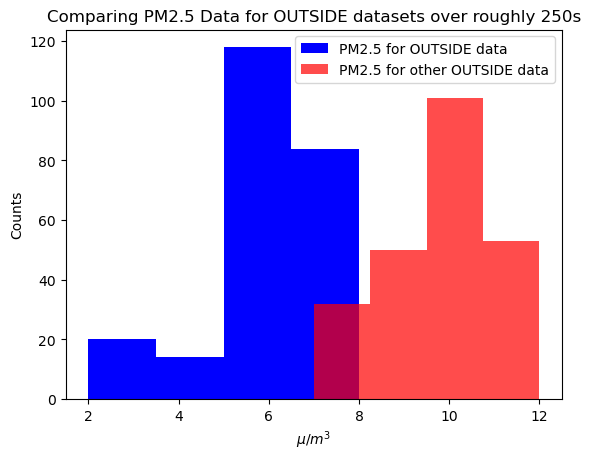

In [12]:
fig = plt.figure()
ax10 = plt.axes()

ax10.hist(outside['PM2.5'], label = 'PM2.5 for OUTSIDE data', bins = 4, color = 'b')
ax10.hist(outside2['PM2.5 (std)'], label = 'PM2.5 for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax10.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM2.5 Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax10)

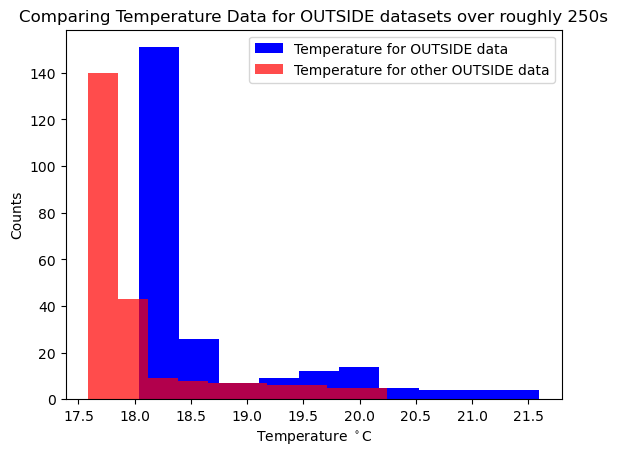

In [13]:
fig = plt.figure()
ax12 = plt.axes()

ax12.hist(outside['Temperature'], label = 'Temperature for OUTSIDE data', bins = 10, color = 'b')
ax12.hist(outside2['Temperature (C)'], label = 'Temperature for other OUTSIDE data', bins = 10, color = 'r', alpha = 0.7)
ax12.set(xlabel = r'Temperature $^\circ$C', ylabel = 'Counts', title = 'Comparing Temperature Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax12)

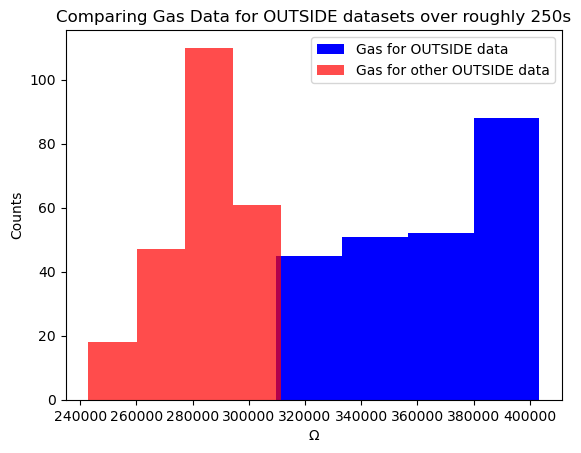

In [14]:
fig = plt.figure()
ax13 = plt.axes()

ax13.hist(outside['Gas'], label = 'Gas for OUTSIDE data', bins = 4, color = 'b')
ax13.hist(outside2['Gas (ohm)'], label = 'Gas for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax13.set(xlabel = r'$\Omega$', ylabel = 'Counts', title = 'Comparing Gas Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax13)

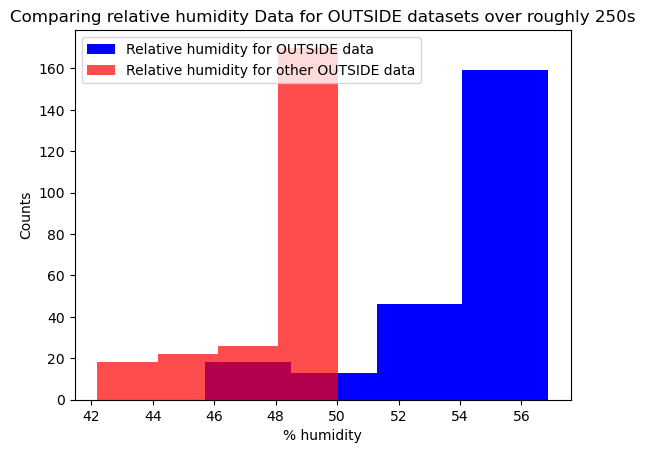

In [15]:
fig = plt.figure()
ax14 = plt.axes()

ax14.hist(outside['Relative Humidity'], label = 'Relative humidity for OUTSIDE data', bins = 4, color = 'b')
ax14.hist(outside2['Humidity (%)'], label = 'Relative humidity for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax14.set(xlabel = '% humidity', ylabel = 'Counts', title = 'Comparing relative humidity Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax14)

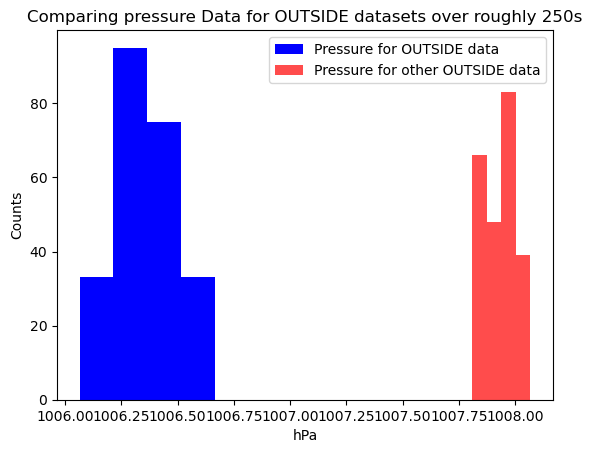

In [16]:
fig = plt.figure()
ax15 = plt.axes()

ax15.hist(outside['Pressure'], label = 'Pressure for OUTSIDE data', bins = 4, color = 'b')
ax15.hist(outside2['Pressure (hPa)'], label = 'Pressure for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax15.set(xlabel = 'hPa', ylabel = 'Counts', title = 'Comparing pressure Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax15)

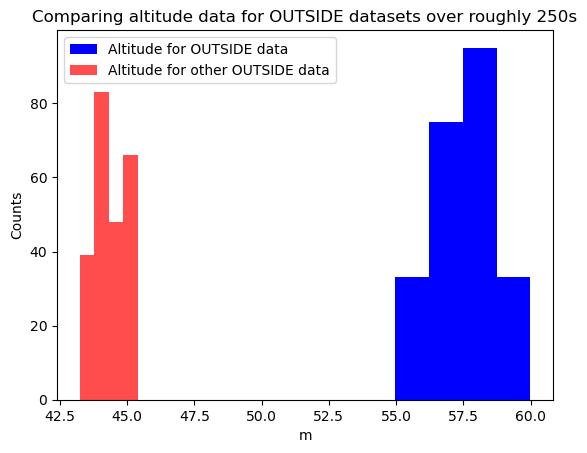

In [17]:
fig = plt.figure()
ax16 = plt.axes()

ax16.hist(outside['Altitude'], label = 'Altitude for OUTSIDE data', bins = 4, color = 'b')
ax16.hist(outside2['Altitude (m)'], label = 'Altitude for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax16.set(xlabel = 'm', ylabel = 'Counts', title = 'Comparing altitude data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax16)

In [18]:
def statdiff(var1, var2, strname, reltol=3,):
    sig1 = np.std(var1)/np.sqrt(sum(var1))

    sig2 = np.std(var2)/np.sqrt(sum(var2))

    sigma = np.sqrt((sig1**2 + sig2**2)/2)

    within3sig = math.isclose(np.mean(var1), np.mean(var2), rel_tol = 3*sigma)

    print(f'The argument that the means of {strname} are within 3 sigma of eachother is {within3sig}')

In [19]:
statdiff(inside['PM1.0'], inside2['PM1 (std)'], 'PM1.0')

The argument that the means of PM1.0 are within 3 sigma of eachother is False


In [20]:
statdiff(inside['PM2.5'], inside2['PM2.5 (std)'], 'PM2.5')

The argument that the means of PM2.5 are within 3 sigma of eachother is False


In [21]:
#statdiff(inside['PM10'], inside2['PM10 (std)'], 'PM10')

This runs and returns as false, but their PM10 data was NaN so this is meaningless.

In [22]:
statdiff(inside['Temperature'], inside2['Temperature (C)'], 'Temperature, C')

The argument that the means of Temperature, C are within 3 sigma of eachother is False


In [23]:
statdiff(inside['Gas'], inside2['Gas (ohm)'], 'Gas')

The argument that the means of Gas are within 3 sigma of eachother is True


In [24]:
statdiff(inside['Relative Humidity'], inside2['Humidity (%)'], 'Relative Humidity')

The argument that the means of Relative Humidity are within 3 sigma of eachother is False


In [25]:
statdiff(inside['Pressure'], inside2['Pressure (hPa)'], 'Pressure')

The argument that the means of Pressure are within 3 sigma of eachother is False


In [26]:
statdiff(inside['Altitude'], inside2['Altitude (m)'], 'Altitude')

The argument that the means of Altitude are within 3 sigma of eachother is False


Despite being taken in the same lab in a similar timeframe, all of the data except the gas data was significantly different. The most likely interpretation is that while the instruments are fairly high precision, at least one may not be accurate.

### Step 3: More locations
- Consider other areas you could take your sensors where you might find a larger change in the data: for example, is there somewhere near lab where the air quality might be significantly worse?
- Set up your system to be able to run in a way that would allow you to get to that location and take ~5 minutes of data.
  - This might require adding additional input arguments, like a delayed start time, or changing to running indefinitely but making sure that your data is being collected and saved even if your script does not run gracefully.
- Compare this new set of data with your other outdoor data, including the same set of graphs and statistical comparisons made for earlier steps.

I'm assuming only histograms since these are taken at different times.

In [27]:
garage = pd.read_csv('outside_data_2.csv')[300:536]
display(garage)

,Time,PM1.0,PM2.5,PM10,Temperature,Gas,Relative Humidity,Pressure,Altitude
300,1.708732e+09,1,2,2,24.201484,156946,40.939985,1005.949643,60.958529
301,1.708732e+09,1,1,1,24.199922,156806,40.733490,1005.950651,60.950090
302,1.708732e+09,1,1,1,24.198359,156389,40.768672,1005.942976,61.014365
303,1.708732e+09,1,1,1,24.190742,155973,40.856256,1005.943112,61.013220
304,1.708732e+09,1,1,1,24.192891,155013,40.974446,1005.943029,61.013916
...,...,...,...,...,...,...,...,...,...
531,1.708733e+09,0,1,1,23.812617,207155,36.634938,1005.882773,61.518549
532,1.708733e+09,0,0,0,23.819063,202791,36.836515,1005.877328,61.564154
533,1.708733e+09,0,0,0,23.826875,201026,37.320621,1005.877511,61.562616
534,1.708733e+09,0,0,0,23.801484,205557,37.710412,1005.877348,61.563987


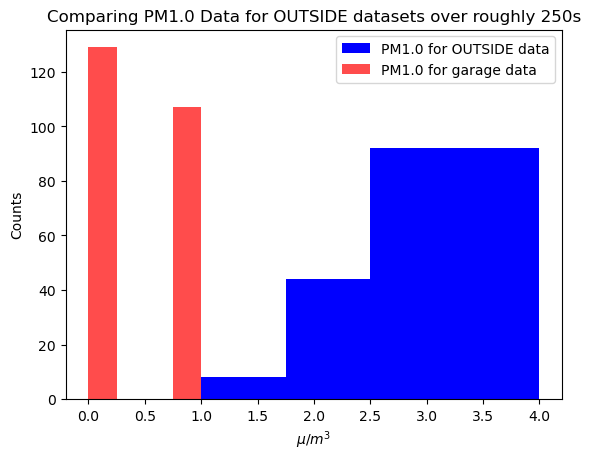

In [28]:
fig = plt.figure()
ax17 = plt.axes()

ax17.hist(outside['PM1.0'], label = 'PM1.0 for OUTSIDE data', bins = 4, color = 'b')
ax17.hist(garage['PM1.0'], label = 'PM1.0 for garage data', bins = 4, color = 'r', alpha = 0.7)
ax17.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM1.0 Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax17)

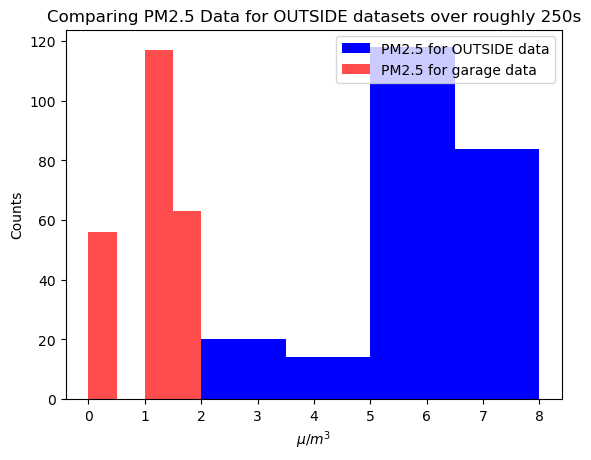

In [29]:
fig = plt.figure()
ax18 = plt.axes()

ax18.hist(outside['PM2.5'], label = 'PM2.5 for OUTSIDE data', bins = 4, color = 'b')
ax18.hist(garage['PM2.5'], label = 'PM2.5 for garage data', bins = 4, color = 'r', alpha = 0.7)
ax18.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM2.5 Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax18)

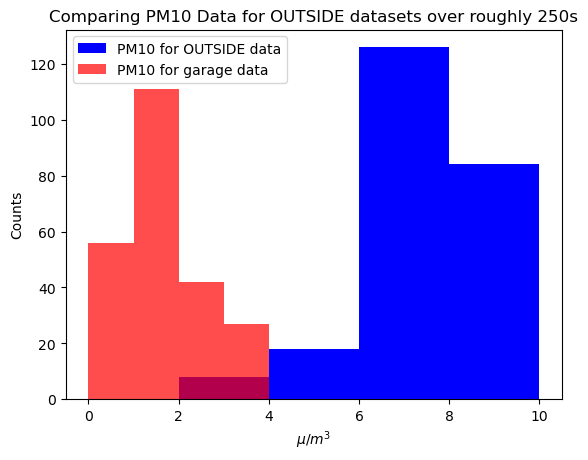

In [30]:
fig = plt.figure()
ax19 = plt.axes()

ax19.hist(outside['PM10'], label = 'PM10 for OUTSIDE data', bins = 4, color = 'b')
ax19.hist(garage['PM10'], label = 'PM10 for garage data', bins = 4, color = 'r', alpha = 0.7)
ax19.set(xlabel = r'$\mu/m^3$', ylabel = 'Counts', title = 'Comparing PM10 Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax19)

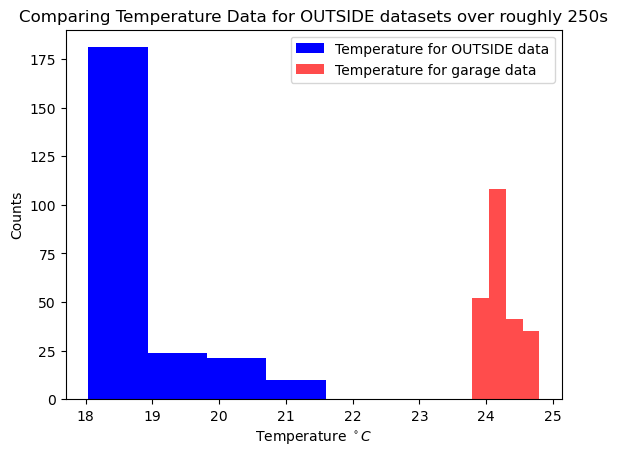

In [31]:
fig = plt.figure()
ax20 = plt.axes()

ax20.hist(outside['Temperature'], label = 'Temperature for OUTSIDE data', bins = 4, color = 'b')
ax20.hist(garage['Temperature'], label = 'Temperature for garage data', bins = 4, color = 'r', alpha = 0.7)
ax20.set(xlabel = r'Temperature $^\circ C$', ylabel = 'Counts', title = 'Comparing Temperature Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax20)

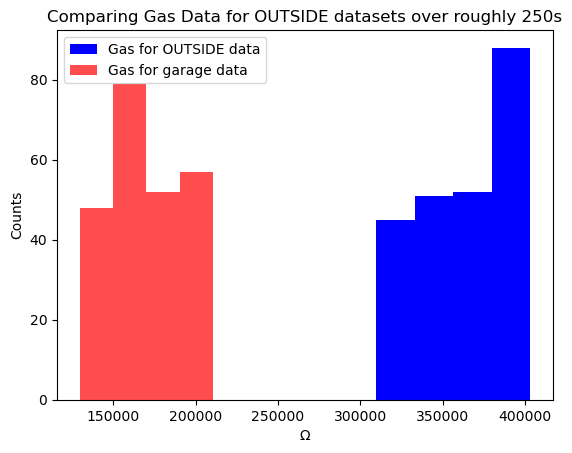

In [32]:
fig = plt.figure()
ax21 = plt.axes()

ax21.hist(outside['Gas'], label = 'Gas for OUTSIDE data', bins = 4, color = 'b')
ax21.hist(garage['Gas'], label = 'Gas for garage data', bins = 4, color = 'r', alpha = 0.7)
ax21.set(xlabel = r'$\Omega$', ylabel = 'Counts', title = 'Comparing Gas Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax21)

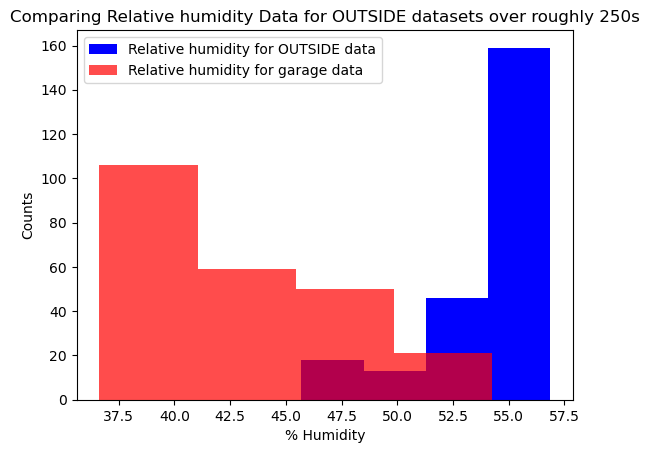

In [33]:
fig = plt.figure()
ax22 = plt.axes()

ax22.hist(outside['Relative Humidity'], label = 'Relative humidity for OUTSIDE data', bins = 4, color = 'b')
ax22.hist(garage['Relative Humidity'], label = 'Relative humidity for garage data', bins = 4, color = 'r', alpha = 0.7)
ax22.set(xlabel = '% Humidity', ylabel = 'Counts', title = 'Comparing Relative humidity Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax22)

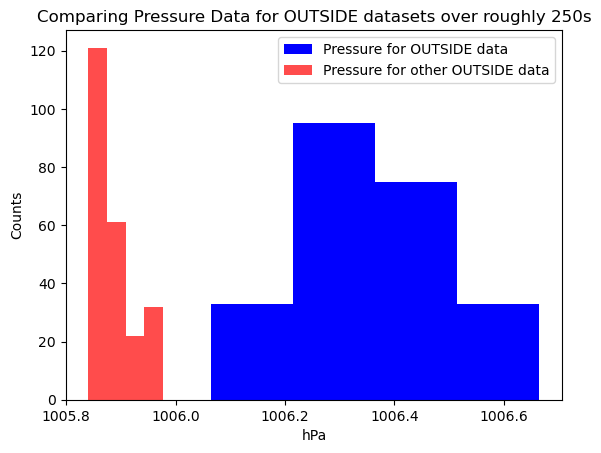

In [34]:
fig = plt.figure()
ax23 = plt.axes()

ax23.hist(outside['Pressure'], label = 'Pressure for OUTSIDE data', bins = 4, color = 'b')
ax23.hist(garage['Pressure'], label = 'Pressure for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax23.set(xlabel = 'hPa', ylabel = 'Counts', title = 'Comparing Pressure Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax23)

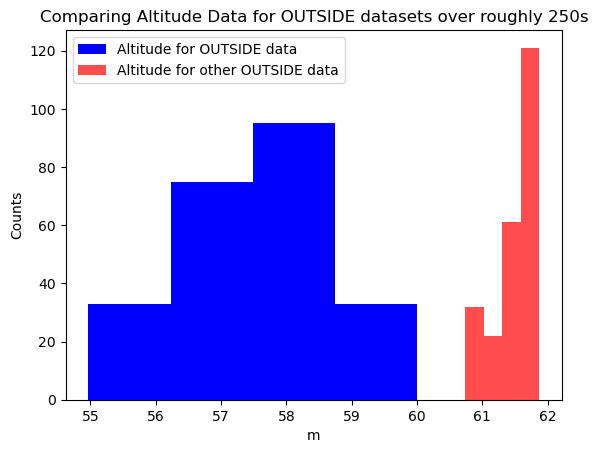

In [35]:
fig = plt.figure()
ax24 = plt.axes()

ax24.hist(outside['Altitude'], label = 'Altitude for OUTSIDE data', bins = 4, color = 'b')
ax24.hist(garage['Altitude'], label = 'Altitude for other OUTSIDE data', bins = 4, color = 'r', alpha = 0.7)
ax24.set(xlabel = 'm', ylabel = 'Counts', title = 'Comparing Altitude Data for OUTSIDE datasets over roughly 250s')

plt.legend()
plt.show(ax24)

In [36]:
statdiff(outside['PM1.0'], garage['PM1.0'],'PM1.0')

The argument that the means of PM1.0 are within 3 sigma of eachother is False


In [37]:
statdiff(outside['PM2.5'], garage['PM2.5'],'PM2.5')

The argument that the means of PM2.5 are within 3 sigma of eachother is False


In [38]:
statdiff(outside['PM10'], garage['PM10'],'PM10')

The argument that the means of PM10 are within 3 sigma of eachother is False


In [39]:
statdiff(outside['Temperature'], garage['Temperature'],'Temperature')

The argument that the means of Temperature are within 3 sigma of eachother is False


In [40]:
statdiff(outside['Gas'], garage['Gas'],'Gas')

The argument that the means of Gas are within 3 sigma of eachother is True


In [41]:
statdiff(outside['Relative Humidity'], garage['Relative Humidity'],'Relative Humidity')

The argument that the means of Relative Humidity are within 3 sigma of eachother is False


In [42]:
statdiff(outside['Pressure'], garage['Pressure'],'Pressure')

The argument that the means of Pressure are within 3 sigma of eachother is True


In [43]:
statdiff(outside['Altitude'], garage['Altitude'],'Altitude')

The argument that the means of Altitude are within 3 sigma of eachother is False


Surprisingly, the air quality in the corner of the Upper Heart parking garage seems to be better than walking around outside. Also surpisingly is that the air pressure on two different days was quite similar.

### Step 4: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How would you quantify this?
  - HINT: there are linear correlation comparisons you can make mathematically such as the Pearson's correlation or similar (linear $R^2$), is the correlation you are seeing linear? Can you implement these in code?
- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.
  - This will require coming up with a way to ensure that the times match between sensors, what about the way you are collecting data ensures that this is true?
 

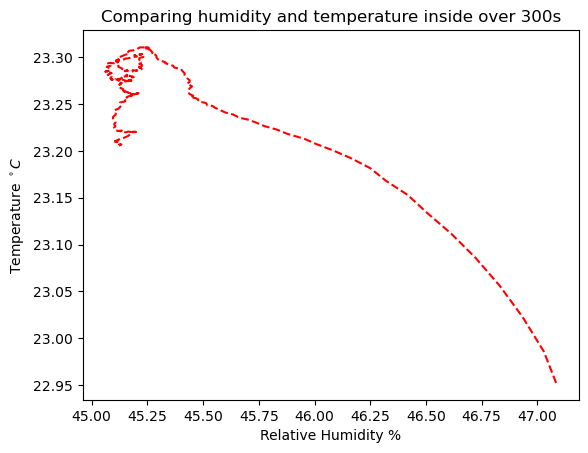

In [99]:
fig = plt.figure()
ax25 = plt.axes()

ax25.plot(inside['Relative Humidity'], inside['Temperature'], ls = '--', c = 'r')
ax25.set(xlabel ='Relative Humidity %' , ylabel = r'Temperature $^\circ C$', title = 'Comparing humidity and temperature inside over 300s')

plt.show(ax25)

While the data is not particularly clean, there does seem to be an inversely linear relationship present. It's very important to take the measurement over the same time frame with the same air.

In [100]:
def pearson(xvar, yvar):
    r=0

    for i in range(len(xvar - 1)):
        x = (xvar[i+1] - np.mean(xvar))
        y = (yvar[i+1] - np.mean(yvar))
        r = r + (x * y)/np.sqrt((x)**2 * (y)**2)
    return r

In [101]:
pearson(inside['Relative Humidity'],inside['Temperature'])

-94.0

As expected, Pearson's coefficient implies a negative linear relationship between the two, which makes sense as the carrying capacity of water in air increases as temperature increases, but the total amount of water held at a given time will be relatively constant.

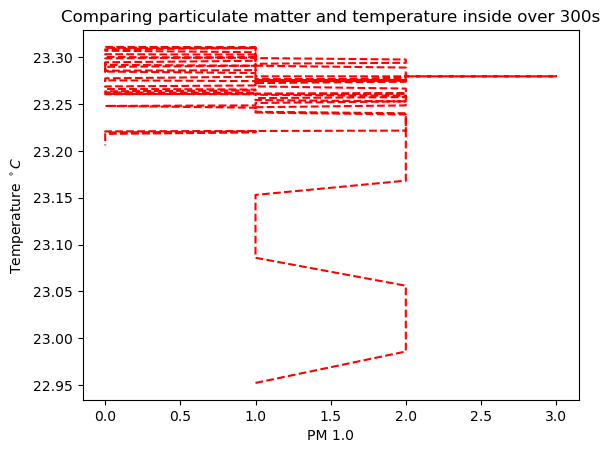

In [102]:
fig = plt.figure()
ax26 = plt.axes()

ax26.plot(inside['PM1.0'], inside['Temperature'], ls = '--', c = 'r')
ax26.set(xlabel ='PM 1.0' , ylabel = r'Temperature $^\circ C$', title = 'Comparing particulate matter and temperature inside over 300s')

plt.show(ax26)

In [103]:
pearson(inside['PM1.0'], inside['Temperature'])

6.0

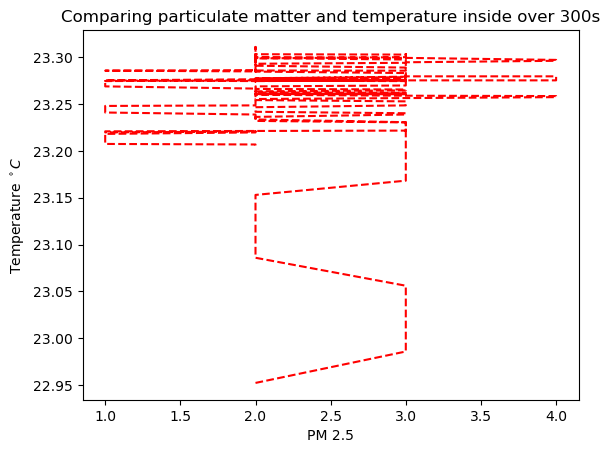

In [104]:
fig = plt.figure()
ax27 = plt.axes()

ax27.plot(inside['PM2.5'], inside['Temperature'], ls = '--', c = 'r')
ax27.set(xlabel ='PM 2.5' , ylabel = r'Temperature $^\circ C$', title = 'Comparing particulate matter and temperature inside over 300s')

plt.show(ax27)

In [105]:
pearson(inside['PM2.5'],inside['Temperature'])

-8.0

The time should match to at most 1s as this was taken with the same code block into the same csv file. Realistically I would expect variance in time of some milliseconds. Furthermore, there's effectively no physical correlation between flat temperature (not gradient) and flow rate of particulate matter, so I wouldn't expect a statistical correlation either.

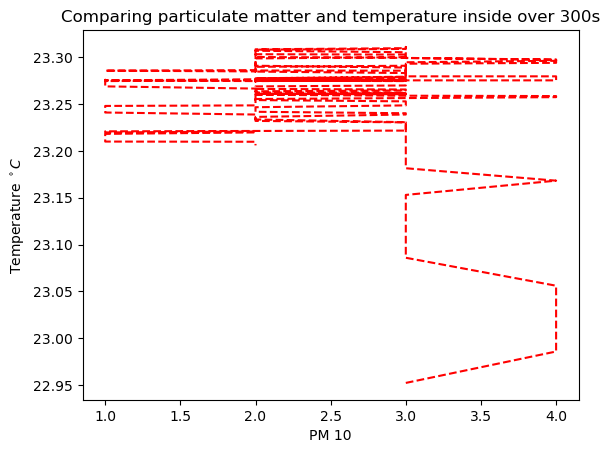

In [106]:
fig = plt.figure()
ax28 = plt.axes()

ax28.plot(inside['PM10'], inside['Temperature'], ls = '--', c = 'r')
ax28.set(xlabel ='PM 10' , ylabel = r'Temperature $^\circ C$', title = 'Comparing particulate matter and temperature inside over 300s')

plt.show(ax28)

In [107]:
pearson(inside['PM10'],inside['Temperature'])

18.0

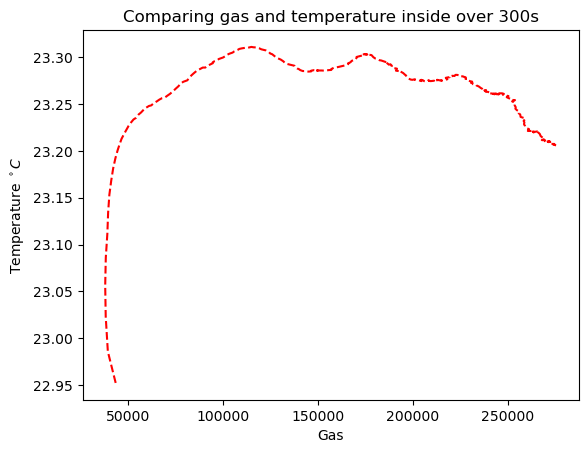

In [108]:
fig = plt.figure()
ax29 = plt.axes()

ax29.plot(inside['Gas'], inside['Temperature'], ls = '--', c = 'r')
ax29.set(xlabel ='Gas' , ylabel = r'Temperature $^\circ C$', title = 'Comparing gas and temperature inside over 300s')

plt.show(ax29)

In [109]:
pearson(inside['Gas'],inside['Temperature'])

-44.0

I believe Pearson's correlation is failing because this is very clearly not linear. There should be a correlation between temperature and VOC's present in the atmosphere, but it's more complicated than linear.

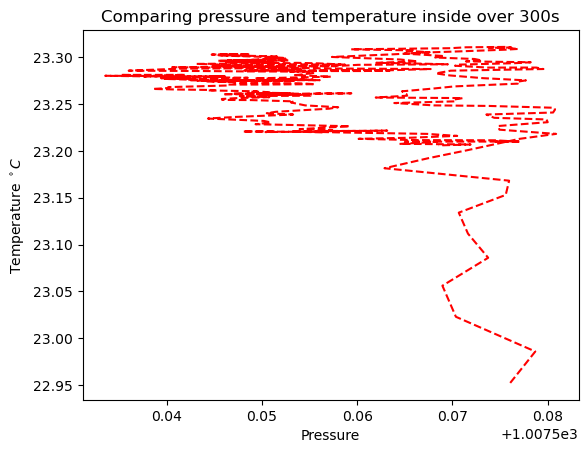

In [110]:
fig = plt.figure()
ax30 = plt.axes()

ax30.plot(inside['Pressure'], inside['Temperature'], ls = '--', c = 'r')
ax30.set(xlabel ='Pressure' , ylabel = r'Temperature $^\circ C$', title = 'Comparing pressure and temperature inside over 300s')

plt.show(ax30)

In [111]:
pearson(inside['Pressure'], inside['Temperature'])

-74.0

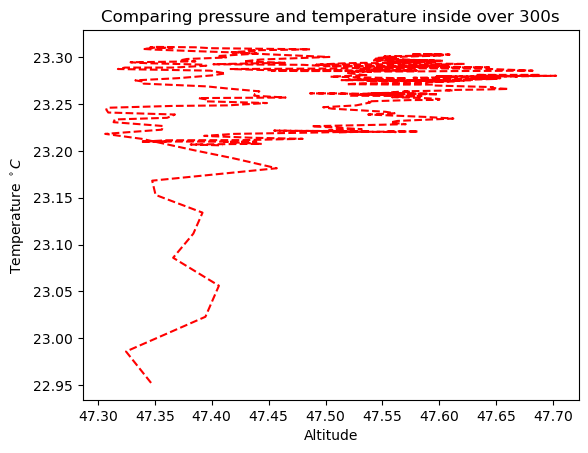

In [112]:
fig = plt.figure()
ax31 = plt.axes()

ax31.plot(inside['Altitude'], inside['Temperature'], ls = '--', c = 'r')
ax31.set(xlabel ='Altitude' , ylabel = r'Temperature $^\circ C$', title = 'Comparing pressure and temperature inside over 300s')

plt.show(ax31)

In [113]:
pearson(inside['Altitude'],inside['Temperature'])

74.0